Creating initial model.
Alarm: Concept drift detected
match_percentage:  0.9889073765945646
Matching model found. Reusing the model.
Alarm: Concept drift detected
match_percentage:  0.0
Creating new model.
Alarm: Concept drift detected
match_percentage:  1.0
match_percentage:  0.0
Matching model found. Reusing the model.
Alarm: Concept drift detected
match_percentage:  0.0
match_percentage:  0.0
18
Alarm: Concept drift detected
match_percentage:  0.0
match_percentage:  0.0
Creating new model.
Alarm: Concept drift detected
match_percentage:  0.0
match_percentage:  1.0
match_percentage:  0.0
Matching model found. Reusing the model.
Alarm: Concept drift detected
match_percentage:  1.0
match_percentage:  0.0
match_percentage:  0.0
Matching model found. Reusing the model.
Alarm: Concept drift detected
match_percentage:  0.0
match_percentage:  0.0
match_percentage:  1.0
Matching model found. Reusing the model.
Alarm: Concept drift detected
match_percentage:  0.0
match_percentage:  0.02079722

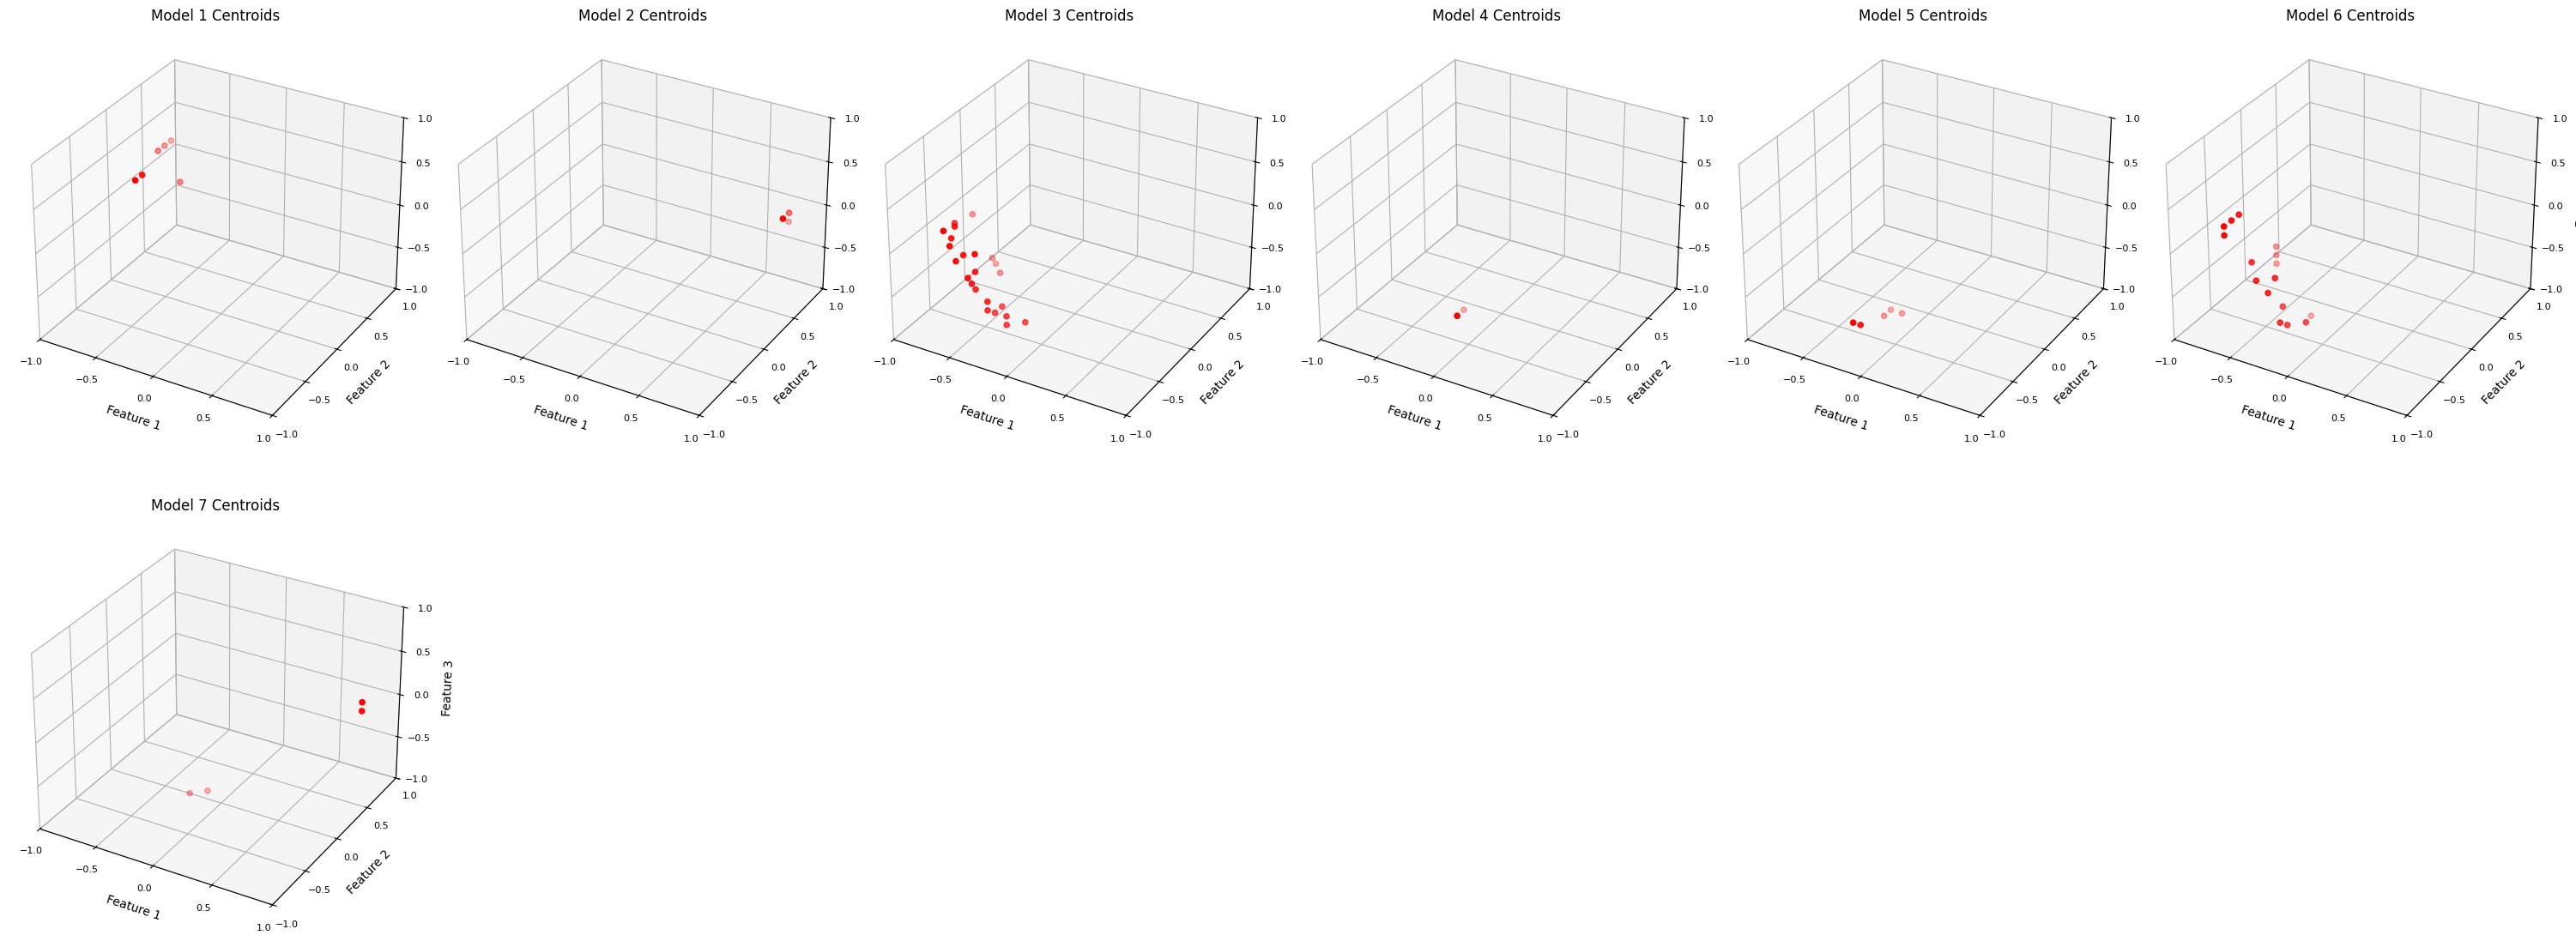

[-0.95  0.65  0.15]
[-0.95  0.75  0.15]
[-0.95  0.85  0.15]
[-0.85  0.15  0.15]
[-0.85  0.25  0.15]
[-0.75  0.65 -0.15]
[0.95 0.35 0.25]
[0.95 0.45 0.15]
[0.95 0.45 0.25]
[-0.75 -0.25  0.05]
[-0.65 -0.65  0.25]
[-0.55 -0.85  0.25]
[-0.55 -0.25 -0.45]
[-0.45 -0.35 -0.45]
[-0.35 -0.95 -0.05]
[-0.35 -0.85 -0.25]
[-0.35 -0.85 -0.05]
[-0.35 -0.85  0.15]
[-0.25 -0.85 -0.45]
[-0.25 -0.85 -0.35]
[-0.25 -0.75 -0.55]
[-0.25 -0.65 -0.55]
[-0.15 -0.75 -0.65]
[-0.15 -0.75 -0.55]
[-0.05 -0.65 -0.65]
[-0.45 -0.95  0.1 ]
[-0.45 -0.85  0.1 ]
[-0.55 -0.95  0.4 ]
[-0.5  -0.95  0.25]
[-0.55 -0.8   0.35]
[-0.55 -0.3  -0.35]
[-0.35 -0.9  -0.15]
[-0.25 -0.25 -0.95]
[-0.25 -0.15 -0.95]
[-0.25 -0.25 -0.95]
[-0.25 -0.15 -0.95]
[-0.15 -0.85 -0.55]
[-0.15 -0.75 -0.65]
[-0.15 -0.15 -0.95]
[-0.55 -0.95  0.35]
[-0.55 -0.95  0.45]
[-0.55 -0.85  0.45]
[-0.55 -0.75  0.45]
[-0.55 -0.25 -0.45]
[-0.55 -0.25 -0.35]
[-0.55 -0.25 -0.25]
[-0.45 -0.75 -0.05]
[-0.35 -0.85 -0.15]
[-0.25 -0.85 -0.25]
[-0.25 -0.75 -0.15]
[-0.25 -0

In [1]:
import csv

import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn import preprocessing

class Preprocessing:
    def __init__(self, file_path):
        self.filename = file_path
        self.data = pd.read_csv(self.filename)
        self.correlation_threshold = 0.5
        self.attribute_size = 42
        self.column_name = []

    def categorical_to_numerical(self): # using label encoding method
        for column in ['protocol_type', 'service', 'flag', 'label']:
            self.data[column] = self.data[column].astype('category')
            self.data[column] = self.data[column].cat.codes
        self.data.fillna(0)

    def filter_method(self): #dimention reduction
        cor = self.data.corr()
        cor_column = abs(cor['label']).tolist()
        column_index = 0
        for column in self.data.columns: # selecting relative features
            self.column_name.append(column)
            if cor_column[column_index] < self.correlation_threshold:
                self.data.drop(column, axis=1, inplace=True)
                self.column_name.remove(column)
            column_index += 1
        for i in range(len(self.data.columns)):
            for j in range(i+1, len(self.data.columns)):
                cor_column = abs(cor[self.data.columns[i]]).tolist()
                if abs(cor_column[j]) > self.correlation_threshold:
                    self.data.drop(self.data.columns[i], axis=1, inplace=True)
                    self.column_name.remove(self.data.columns[i])

    def standardization(self):
        scaler = preprocessing.StandardScaler().fit(self.data)
        self.data = scaler.transform(self.data)

    def run(self):
        label_names = self.data["label"]
        self.categorical_to_numerical()
        self.filter_method()
        # self.standardization()
        # self.data = self.data.tolist()
        # self.attribute_size = len(self.data[0])
        return self.data, label_names


import numpy as np
from sklearn.cluster import KMeans
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import random
import math



# from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_information_score, davies_bouldin_score


class MicroCluster:
    def __init__(self, centroid, radius=0.3, count=1):
        self.centroid = np.array(centroid)
        self.radius = radius
        self.count = count

    def update(self, point):
        # Incrementally update the centroid and radius
        self.count += 1
        old_centroid = self.centroid.copy()
        self.centroid = (self.centroid * (self.count - 1) + point) / self.count
        # self.radius = np.linalg.norm(self.centroid - old_centroid)  # Do not update the radius


class Model:
    def __init__(self, clusters=None):
        if clusters is None:
            clusters = []
        self.clusters = clusters


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from scipy.spatial.distance import cdist

# Generate some sample data
np.random.seed(0)
data = np.random.rand(1000, 3)  # 1000 data points in 3 dimensions



class CharacteristicVector:
    def __init__(self, last_update_time, density, status='sparse', label=None):
        self.last_update_time = last_update_time  # Last time the grid was updated
        self.density = density                    # Current density of the grid
        self.status = status                      # Grid status: 'sparse' or 'dense'
        self.label = label                        # Label for the grid

    def update_density(self, current_time, decay_factor, new_data_points=1):
        # Decay the density over time since the last update
        time_diff = current_time - self.last_update_time
        self.density *= decay_factor ** time_diff  # Decay density based on time elapsed
        
        # Update density with new data points
        self.density += new_data_points
        
        # Update last update time
        self.last_update_time = current_time

        # Update status based on new density
        self.status = 'dense' if self.density >= 3 else 'sparse'  # Example threshold value








def micro_clustering(data, sample_size=50, grid_size=0.1, density_threshold=3, cluster__max_numbers=23):
    # Randomly sample 50 data points from the dataset
    sample_size = data.shape[0]
    sample_indices = np.random.choice(data.shape[0], sample_size, replace=False)
    sampled_data = data[sample_indices]

    # Parameters for grid-based clustering
    grid_size = grid_size  # Smaller grid size for more granular clustering
    density_threshold = density_threshold  # Threshold adjusted for small samples

    # Create grid
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = -1, 1
    x_bins = np.arange(x_min, x_max, grid_size)
    y_bins = np.arange(y_min, y_max, grid_size)
    z_bins = np.arange(z_min, z_max, grid_size)

    # Assign points to grid cells
    grid = np.zeros((len(x_bins), len(y_bins), len(z_bins)))
    for point in sampled_data:
        x_index = np.digitize(point[0], x_bins) - 1
        y_index = np.digitize(point[1], y_bins) - 1
        z_index = np.digitize(point[2], z_bins) - 1
        grid[x_index, y_index, z_index] += 1

    # Identify clusters
    clusters = np.argwhere(grid >= density_threshold)
    # print(clusters)
    # print(grid)
    cluster_centers = [
        (x_bins[coord[0]] + grid_size / 2, y_bins[coord[1]] + grid_size / 2, z_bins[coord[2]] + grid_size / 2) for coord
        in clusters]

    # Merge clusters to achieve exactly 5 clusters
    while len(cluster_centers) > cluster__max_numbers:
        distances = cdist(cluster_centers, cluster_centers)
        np.fill_diagonal(distances, np.inf)

        closest_pair = np.unravel_index(np.argmin(distances), distances.shape)
        new_center = np.mean([cluster_centers[closest_pair[0]], cluster_centers[closest_pair[1]]], axis=0)

        cluster_centers.pop(max(closest_pair))
        cluster_centers.pop(min(closest_pair))
        cluster_centers.append(tuple(new_center))
    # print("the numbers of clusters", len(cluster_centers), "sample size ", sample_size)
    return cluster_centers



import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

def micro_clustering_DBScan(data, sample_size=50, eps=0.1, min_samples=5, cluster__max_numbers=23):
    data = data[:, :-1]
    # Sample data points if sample_size is less than the total number of data points
    sample_size = data.shape[0]
    sample_indices = np.random.choice(data.shape[0], sample_size, replace=False)
    sampled_data = data[sample_indices]


    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(sampled_data)

    # Extract cluster centers by calculating the mean of points in each cluster
    cluster_centers = []
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Skip noise points (label == -1)
            continue
        cluster_points = sampled_data[labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)

    # If there are more clusters than desired, merge clusters
    while len(cluster_centers) > cluster__max_numbers:
        distances = cdist(cluster_centers, cluster_centers)
        np.fill_diagonal(distances, np.inf)

        closest_pair = np.unravel_index(np.argmin(distances), distances.shape)
        new_center = np.mean([cluster_centers[closest_pair[0]], cluster_centers[closest_pair[1]]], axis=0)

        cluster_centers.pop(max(closest_pair))
        cluster_centers.pop(min(closest_pair))
        cluster_centers.append(new_center)
    return cluster_centers



def find_matching_model(samples, models, percentage_threshold=0.95, ):
    best_model = None
    max_match_percentage = 0
    min_total_error = float('inf')
    best_model_index = 0

    flag = -1
    for model in models:
        flag+=1
        max_match_percentage = percentage_threshold
        match_count = 0
        total_error = 0
        for sample in samples:
            closest_cluster = min(model.clusters, key=lambda cluster: np.linalg.norm(cluster.centroid - sample[:-1]))
            distance = np.linalg.norm(closest_cluster.centroid - sample[:-1])
            if distance <= closest_cluster.radius:
                match_count += 1
            total_error += distance

        match_percentage = match_count / len(samples)
        print("match_percentage: ", match_percentage)
        if match_percentage > max_match_percentage:
            max_match_percentage = match_percentage
            best_model = model
            best_model_index = flag
            min_total_error = total_error
        elif match_percentage == max_match_percentage and total_error < min_total_error:
            best_model = model
            best_model_index = flag
            min_total_error = total_error

    return best_model, best_model_index


# class PageHinkley:
#     def __init__(self, delta=0.005, lambda_=30, alpha=0.99):
#         self.delta = delta
#         self.lambda_ = lambda_
#         self.alpha = alpha
#         self.cum_sum = 0
#         self.min_cum_sum = 0
#         self.m = 0
#         self.t = 0

#     def update(self, value):
#         self.t += 1
#         self.m = self.alpha * self.m + (1 - self.alpha) * value
#         self.cum_sum += value - self.m - self.delta
#         # print(self.cum_sum, self.min_cum_sum, self.cum_sum - self.min_cum_sum, self.lambda_)
#         if self.cum_sum < self.min_cum_sum:
#             self.min_cum_sum = self.cum_sum

#         if self.cum_sum - self.min_cum_sum > self.lambda_:

#             self.reset()
#             return True
#         return False

#     def reset(self):
#         self.cum_sum = 0
#         self.min_cum_sum = 0
#         self.m = 0
#         self.t = 0


class PageHinkley:
    def __init__(self, delta=0.005, lambda_W=50, lambda_A=100, warm_up_period=100, alpha=1 - 0.0001):
        self.delta = delta
        self.lambda_W = lambda_W
        self.lambda_A = lambda_A
        self.warm_up_period = warm_up_period
        self.reset()
        self.point_count = 0
        self.sum = 0
        self.alpha = alpha
        self.delta = delta
        self.M_T = float('inf')

    def reset(self):
        self.m_T = 0
        self.M_T = float('inf')
        self.cumulative_sum = []
        self.buffer = []
        self.point_count = 0

    def update(self, D_i, ):
        self.point_count += 1
        if len(self.cumulative_sum) == 0:
            self.mean_D_i = D_i
        else:
            self.mean_D_i = (self.mean_D_i * len(self.cumulative_sum) + D_i) / (len(self.cumulative_sum) + 1)


        
        deviation = D_i - self.mean_D_i - self.delta
        # deviation = D_i - self.mean_D_i
        # deviation = abs(deviation)
        self.m_T += deviation
        self.cumulative_sum.append(deviation)

        self.M_T = min(abs(self.M_T), abs(self.m_T))

        if self.point_count <= self.warm_up_period:
            return False

        # print(self.m_T, self.M_T, "diffrent: ", self.m_T- self.M_T )
        # print(D_i)
        # print(D_i)

        if abs(self.m_T - self.M_T) > self.lambda_A:
            print("Alarm: Concept drift detected")
            # self.buffer.append(D_i)
            # print("------------------------------------------------------------ di", D_i, self.m_T, self.M_T)
            self.reset()
            return "alarm"

        if abs(self.m_T - self.M_T) > self.lambda_W:
            # print("Warning: Possible concept drift detected")
            # self.buffer.append(D_i)
            return "warning"

        return False


def calculate_model_accuracy(data, model):
    # Calculate distances and assign points to the nearest centroid
    clusters_points = {i: [] for i in range(len(model.clusters))}
    for point in data.values:
        distances = [np.linalg.norm(cluster.centroid - point[:-1]) for cluster in model.clusters]
        nearest_cluster_index = np.argmin(distances)
        #  ---------------------------------------------------------------------- inja mishe limit gozasht vaseye distance (outlayer detection)
        clusters_points[nearest_cluster_index].append(point)

    accuracies = []
    correct_count = 0
    total_count = 0

    # Prepare a 3D plot for the clusters
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster_index, points in clusters_points.items():
        if points:
            labels, counts = np.unique([point[-1] for point in points], return_counts=True)
            dominant_label_index = counts.argmax()
            dominant_label = labels[dominant_label_index]
            dominant_label_count = counts[dominant_label_index]
            accuracy = dominant_label_count / len(points)
            accuracies.append(accuracy)

            # cluster_predicted_label = "normal" if label_dict[dominant_label] == "normal" else "attack"
            # for point in points:
            #     true_label = "normal" if label_dict[point[-1]] == "normal" else "attack"
            #     if true_label == cluster_predicted_label:
            #         correct_count += 1  # Count correctly classified points
            
            # # Update total count of points

            correct_count += dominant_label_count
            total_count += len(points)

            for point in points:
                true_label = point[-1]
                color = 'g' if true_label == 0 else 'r'  # Green for normal, Red for attack
                ax.scatter(point[0], point[1], point[2], c=color, alpha=0.6)
            
            # Plot the centroid of the cluster
            centroid = model.clusters[cluster_index].centroid
            ax.scatter(centroid[0], centroid[1], centroid[2], c='blue', marker='x', s=100)  # Blue 'x' for centroids
            
            
            
            print(f"Cluster {cluster_index} Accuracy: {accuracy * 100:.2f}%, Cluster label: {label_dict[dominant_label]}")

    # model_accuracy = np.mean(accuracies) if accuracies else 0
    model_accuracy = correct_count / total_count if total_count else 0
    print(f"Model Accuracy: {model_accuracy * 100:.2f}%")
    
    # Set plot labels and title
    ax.set_title('Cluster Visualization (Normal vs. Attack)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    # Show plot
    plt.tight_layout()
    plt.show()
    
    return model_accuracy


# Simulation of the stream
def simulate_stream(data, window_size=500, numberOfLabels=23):
    # label_column = data.pop('label')
    models = []
    window = deque(maxlen=window_size)
    ph_test = PageHinkley(delta=0.001, lambda_W=30, lambda_A=50, warm_up_period=window_size)
    buffer = []
    current_model = None
    numbers_of_clusters = []
    using_store_times = []
    create_model_times = []
    using_store_times_index = []

    for point_index in range(len(data)):
        point = data.iloc[point_index].values
        window.append(point)
       
        if len(window) == window_size:
            if current_model:
                numbers_of_clusters.append(len(current_model.clusters))
            if current_model is None:
                print("Creating initial model.")
                cluster_centers = micro_clustering(np.array(window))
                clusters = [MicroCluster(center) for center in cluster_centers]
                current_model = Model(clusters)
                models.append(current_model)
                for init_point in window:
                    D_i = np.min(
                        [np.linalg.norm(cluster.centroid - init_point[:-1]) for cluster in current_model.clusters])
                    ph_test.update(D_i)
                create_model_times.append(point_index)
                continue

            D_i = np.min([np.linalg.norm(cluster.centroid - point[:-1]) for cluster in current_model.clusters])
            drift_detected = ph_test.update(D_i)

            if drift_detected == "warning":
                buffer.append(point)
            if drift_detected == "alarm":
                if len(buffer) < 5:
                    continue
                if models:
                    matched_model, best_model_index = find_matching_model(buffer, models)
                    if matched_model:
                        print("Matching model found. Reusing the model.")
                        current_model = matched_model
                        buffer = []
                        using_store_times.append(point_index)
                        using_store_times_index.append(best_model_index)
                        continue
                if len(buffer) > 23:
                    print("Creating new model.")
                    cluster_centers = micro_clustering(np.array(buffer))
                    # if len(cluster_centers) < numberOfLabels:
                    #     print("The number of clusters are ", len(cluster_centers), "not", numberOfLabels)
                    #     continue
                    clusters = [MicroCluster(center) for center in cluster_centers]
                    new_model = Model(clusters)
                    models.append(new_model)
                    current_model = new_model
                    buffer = []
                    create_model_times.append(point_index)
                else:
                    print(len(buffer))
        else:
            numbers_of_clusters.append(0)

    # for i, model in enumerate(models):
    #     print(f"Evaluating Model {i + 1}")
    #     model_accuracy = calculate_model_accuracy(data[0:100], model)

    num_models = len(models)
    cols = 6
    rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed
    
    fig = plt.figure(figsize=(5 * cols, 6 * rows))
    axs = [fig.add_subplot(rows, cols, i + 1, projection='3d') for i in range(num_models)]
    
    for idx, ax in enumerate(axs):
        model = models[idx]
        centroids = np.array([cluster.centroid for cluster in model.clusters])
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', color='r')
        ax.set_title(f'Model {idx + 1} Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        
        # Set all three dimensions (x, y, z) to range between -1 and 1
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    
        # Reduce the number of ticks on each axis
        ax.set_xticks(np.linspace(-1, 1, 5))  # Fewer ticks
        ax.set_yticks(np.linspace(-1, 1, 5))
        ax.set_zticks(np.linspace(-1, 1, 5))
        
        # Adjust tick parameters: reduce label size and increase padding
        ax.tick_params(axis='x', labelsize=8, pad=3)  # Smaller font size and padding
        ax.tick_params(axis='y', labelsize=8, pad=3)
        ax.tick_params(axis='z', labelsize=8, pad=3)
    
    # Adjust deletion of axes to ensure no out of range errors
    if num_models < rows * cols:
        for ax in axs[num_models:]:  # Get the unused axes from the list
            fig.delaxes(ax)  # Properly delete unused axes
    
    plt.tight_layout()
    plt.savefig('cluster_centroids.jpg', format='jpg')
    plt.show()
    for i in models:
        for j in i.clusters:
            print(j.centroid)
    return models, numbers_of_clusters, using_store_times, create_model_times, using_store_times_index


def preprocess_data(data, sample_size=1000, standardize=True, reduce_dim=False, n_components=10):
    # Sampling
    # sampled_data = data.sample(n=sample_size)
    sampled_data = data

    # Standardization using Min-Max Scaler with range -1 to 1
    if standardize:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        sampled_data = pd.DataFrame(scaler.fit_transform(sampled_data), columns=sampled_data.columns)

    # Dimensionality Reduction
    if reduce_dim:
        pca = PCA(n_components=n_components)
        sampled_data = pca.fit_transform(sampled_data)
        sampled_data = pd.DataFrame(sampled_data, columns=[f'PC{i+1}' for i in range(n_components)])

        # Rescale the PCA output back to range -1 to 1
        scaler = MinMaxScaler(feature_range=(-1, 1))
        sampled_data = pd.DataFrame(scaler.fit_transform(sampled_data), columns=sampled_data.columns)

    return sampled_data


# Dummy data simulation
data = pd.DataFrame(np.random.rand(10000, 50), columns=[f'feature_{i}' for i in range(50)])


def drift_detection(num_samples, change_points, dimensions=10):
    data = []
    current_mean = np.random.rand(dimensions) * 10  # initial random mean
    current_cov = np.eye(dimensions)  # initial covariance matrix

    samples_per_segment = num_samples // len(change_points)

    for i, point in enumerate(change_points):
        if i > 0:
            samples_per_segment = change_points[i] - change_points[i - 1]
        # Generate random data with current mean and covariance
        segment_data = np.random.multivariate_normal(current_mean, current_cov, size=samples_per_segment)
        data.append(segment_data)

        # Change distribution properties
        current_mean = np.random.rand(dimensions) * 10  # new random mean
        current_cov = np.eye(dimensions) * np.random.rand(dimensions)  # new random covariance

    # Generate data for the last segment if needed
    last_segment_size = num_samples - sum(len(x) for x in data)
    if last_segment_size > 0:
        segment_data = np.random.multivariate_normal(current_mean, current_cov, size=last_segment_size)
        data.append(segment_data)

    # Combine all segments
    data = np.vstack(data)
    return pd.DataFrame(data, columns=[f'feature_{i}' for i in range(dimensions)])


# Example of generating data with drift
num_samples = 10000
# change_points = [500, 700, 900, 1400, 1700, 2300, 2600, 3400, 4200, 5000, 7500]  # Points at which the data distribution changes
random_numbers = np.sort(np.random.choice(range(7501), size=40, replace=False))
change_points = random_numbers.tolist()
data = drift_detection(num_samples, change_points)

# dataset data

# preprocess = Preprocessing(f"H:\TemprorayCodes\Miss.Rezaei\data.csv")
# data2, label_names = preprocess.run()
# # data2 = np.vstack(data2)
# # data2 = pd.DataFrame(data2, columns=[f'feature_{i}' for i in range(data2.shape[1])])


# label_column = data2.pop('label')

# # Preprocess the data
# preprocessed_data = preprocess_data(data2, sample_size=10000, standardize=True, reduce_dim=True, n_components=3)
# preprocessed_data = pd.DataFrame(preprocessed_data)

# # preprocessed_data['label'] = label_column
# # preprocessed_data['label_names'] = label_names

# # label_dict = {label: name for label, name in zip(label_column, label_names)}
# # data = np.random.rand(10000, 41)  # Simulated data points

# label_dict_old = {label: name for label, name in zip(label_column, label_names)}
# label_column_new = label_column.apply(lambda x: 0 if label_dict_old[x] == "normal" else 1)
# preprocessed_data['label'] = label_column_new

# label_dict = {0: "normal", 1:"attack"}

# # shuffled_data = preprocessed_data.sample(frac=1, random_state=42).reset_index(drop=True)

# number_of_labales = 23
# models, numbers_of_clusters = simulate_stream(preprocessed_data[0:100000], numberOfLabels=number_of_labales)


preprocess = Preprocessing(r"H:\TemprorayCodes\Miss.Rezaei\data.csv")
data2, label_names = preprocess.run()

# Extract the label column from data2
label_column = data2.pop('label')

# Create a dictionary to map labels to their names
label_dict_old = {label: name for label, name in zip(label_column, label_names)}

# Map label names to the label column for filtering
data2['label'] = label_column
data2['label_names'] = label_column.map(label_dict_old)

# Filter the data to keep only rows where label_names are "normal", "neptune", or "smurf"
filtered_data = data2[data2['label_names'].isin(["normal", "neptune", "smurf"])]
# filtered_data = data2

normal_data = filtered_data[filtered_data['label_names'] == "normal"]
neptune_data = filtered_data[filtered_data['label_names'] == "neptune"]
smurf_data = filtered_data[filtered_data['label_names'] == "smurf"]


# Create function to batch data in cycles of 10,000
def create_cycled_batches(normal_data, neptune_data, smurf_data, batch_size=10000):
    # Calculate the minimum length that can be divided into batches
    min_length = min(len(normal_data), len(neptune_data), len(smurf_data))
    total_batches = min_length // batch_size

    # Collect batches
    batches = []
    for i in range(total_batches):
        batches.append(smurf_data[i * batch_size:(i + 1) * batch_size])
        batches.append(normal_data[i * batch_size:(i + 1) * batch_size])
        batches.append(neptune_data[i * batch_size:(i + 1) * batch_size])

    # Concatenate all batches
    return pd.concat(batches).reset_index(drop=True)


# Create cycled batches
cycled_data = create_cycled_batches(normal_data, neptune_data, smurf_data)

filtered_data = cycled_data

label_column = filtered_data["label"]

# Preprocess the filtered data
preprocessed_data = preprocess_data(
    filtered_data.drop(columns=['label_names']),
    sample_size=10000,
    standardize=True,
    reduce_dim=True,
    n_components=3
)
preprocessed_data = pd.DataFrame(preprocessed_data)

# Map the filtered label names to a binary classification
label_column_new = filtered_data['label_names'].apply(lambda x: 0 if x == "normal" else 1)
preprocessed_data['label'] = label_column_new

# Update the label dictionary to reflect the new classification
label_dict = {0: "normal", 1: "attack"}
number_of_labels = 23
models, numbers_of_clusters, using_store_times, create_model_times, using_store_times_index = simulate_stream(preprocessed_data, numberOfLabels=number_of_labels)





In [2]:
using_store_times_index

[0,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 5,
 1,
 0,
 4,
 2,
 4,
 5,
 5,
 5,
 5]

In [3]:
preprocessed_data.min()

PC1     -1.0
PC2     -1.0
PC3     -1.0
label    0.0
dtype: float64

In [4]:
len(numbers_of_clusters)

269999

In [5]:
def calculate_model_accuracy(data, model):
    # Calculate distances and assign points to the nearest centroid
    clusters_points = {i: [] for i in range(len(model.clusters))}
    flag = 0
    for point in data.values:
        flag+=1
        # if flag % 1000 == 0:
            # print(flag, end=" ")
        distances = [np.linalg.norm(cluster.centroid - point[:-1]) for cluster in model.clusters]
        nearest_cluster_index = np.argmin(distances)
        #  ---------------------------------------------------------------------- inja mishe limit gozasht vaseye distance (outlayer detection)
        clusters_points[nearest_cluster_index].append(point)

    accuracies = []
    correct_count = 0
    total_count = 0

    # # Prepare a 3D plot for the clusters
    # fig = plt.figure(figsize=(10, 8))
    # ax = fig.add_subplot(111, projection='3d')

    print("Done")
    flag=0
    for cluster_index, points in clusters_points.items():
        flag+=1
        # print(flag)
        if points:
            labels, counts = np.unique([point[-1] for point in points], return_counts=True)
            dominant_label_index = counts.argmax()
            dominant_label = labels[dominant_label_index]
            dominant_label_count = counts[dominant_label_index]
            accuracy = dominant_label_count / len(points)
            accuracies.append(accuracy)

            # cluster_predicted_label = "normal" if label_dict[dominant_label] == "normal" else "attack"
            # for point in points:
            #     true_label = "normal" if label_dict[point[-1]] == "normal" else "attack"
            #     if true_label == cluster_predicted_label:
            #         correct_count += 1  # Count correctly classified points
            
            # # Update total count of points

            correct_count += dominant_label_count
            total_count += len(points)

            for point in points:
                true_label = point[-1]
                color = 'g' if true_label == 0 else 'r'  # Green for normal, Red for attack
                # ax.scatter(point[0], point[1], point[2], c=color, alpha=0.6)
            
            # Plot the centroid of the cluster
            centroid = model.clusters[cluster_index].centroid
            # ax.scatter(centroid[0], centroid[1], centroid[2], c='blue', marker='x', s=100)  # Blue 'x' for centroids
            
            
            
            print(f"Cluster {cluster_index} Accuracy: {accuracy * 100:.2f}%, Cluster label: {label_dict[dominant_label]}")

    # model_accuracy = np.mean(accuracies) if accuracies else 0
    model_accuracy = correct_count / total_count if total_count else 0
    print(f"Model Accuracy: {model_accuracy * 100:.2f}%")
    
    # # Set plot labels and title
    # ax.set_title('Cluster Visualization (Normal vs. Attack)')
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    # ax.set_zlabel('Feature 3')

    # # Show plot
    # plt.tight_layout()
    # plt.show()
    
    return model_accuracy

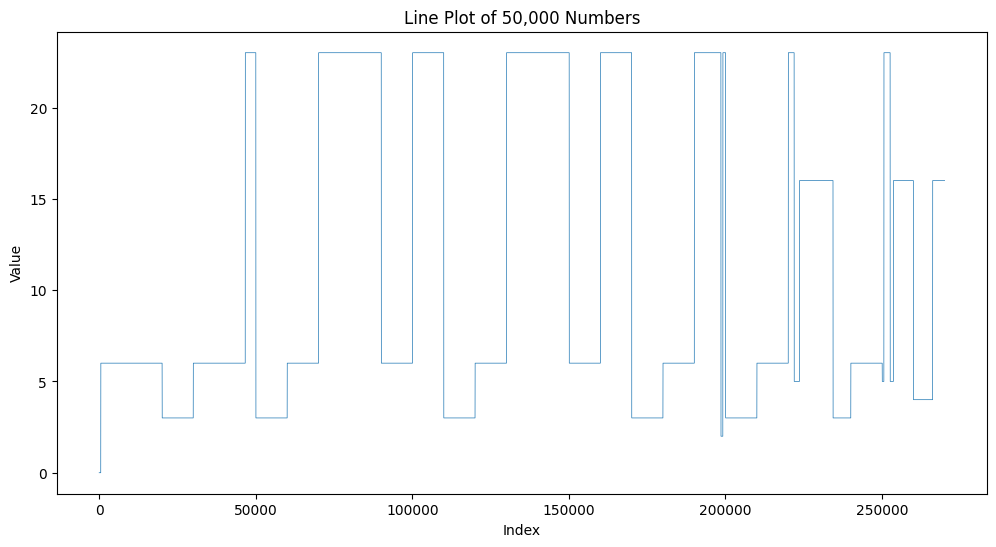

In [6]:
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plt.plot(numbers_of_clusters, linewidth=0.5)  # Plot with a smaller line width
plt.title('Line Plot of 50,000 Numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(False)
plt.show()

In [7]:
label_column = label_column
hange_indices = label_column.ne(label_column.shift())  # Finds where the label changes

# Get the indices and corresponding labels where the changes occur
start_indices = label_column.index[hange_indices]
labels_at_changes = label_column[hange_indices]

# Combine indices and labels into a DataFrame
result = pd.DataFrame({'Index': start_indices, 'Label': labels_at_changes})

# If you have a label dictionary and want to map numeric labels to their string representation
# Assuming label_dict contains the mapping from numbers to label names
result['Label_Name'] = result['Label'].map(label_dict_old)


In [8]:
result

,Index,Label,Label_Name
0,0,18,smurf
10000,10000,11,normal
20000,20000,9,neptune
30000,30000,18,smurf
40000,40000,11,normal
50000,50000,9,neptune
60000,60000,18,smurf
70000,70000,11,normal
80000,80000,9,neptune
90000,90000,18,smurf


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15284\841576904.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


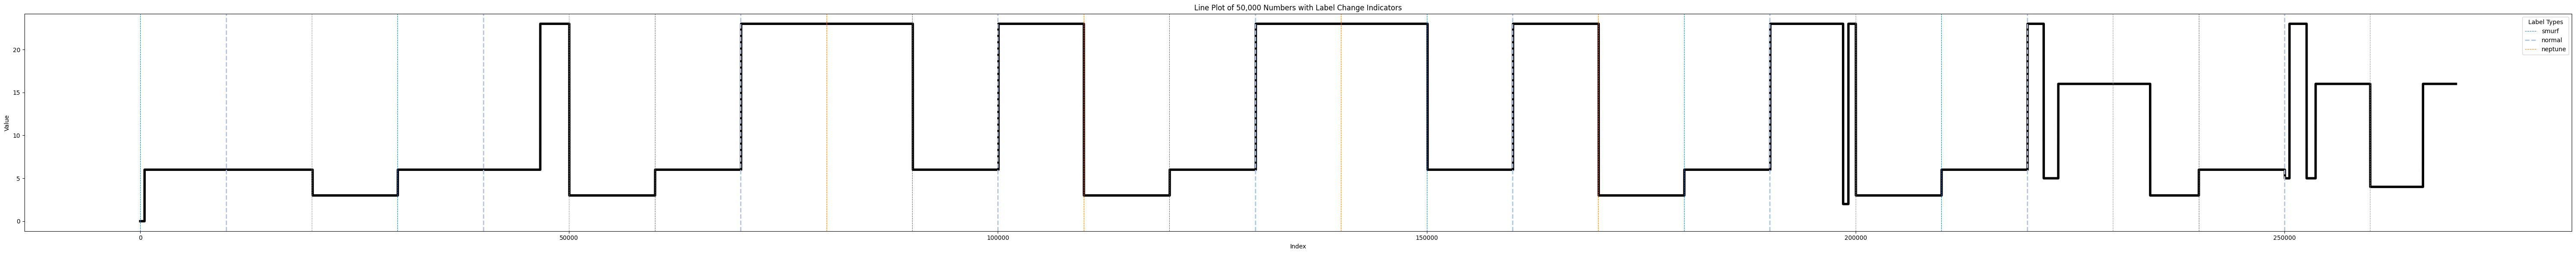

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(60, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=4, color="black", label='Number of Clusters')  # Your main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Overlay the vertical dashed lines at the change points
lines = {}  # Dictionary to keep track of the line handles for the legend
for _, row in result.iterrows():
    # Draw dashed lines and store the line handle in lines dict for the first occurrence of each label
    line_width = 2 if row['Label_Name'] == 'normal' else 0.75  # Thicker lines for "normal"
    line = plt.axvline(x=row['Index'], linestyle='--', color=color_map[row['Label_Name']], linewidth=line_width)
    if row['Label_Name'] not in lines:
        lines[row['Label_Name']] = line  # Save the line handle for this label type

# Add legend for the label types using the line handles
plt.legend(lines.values(), lines.keys(), title='Label Types', loc='upper right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15284\1725502877.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


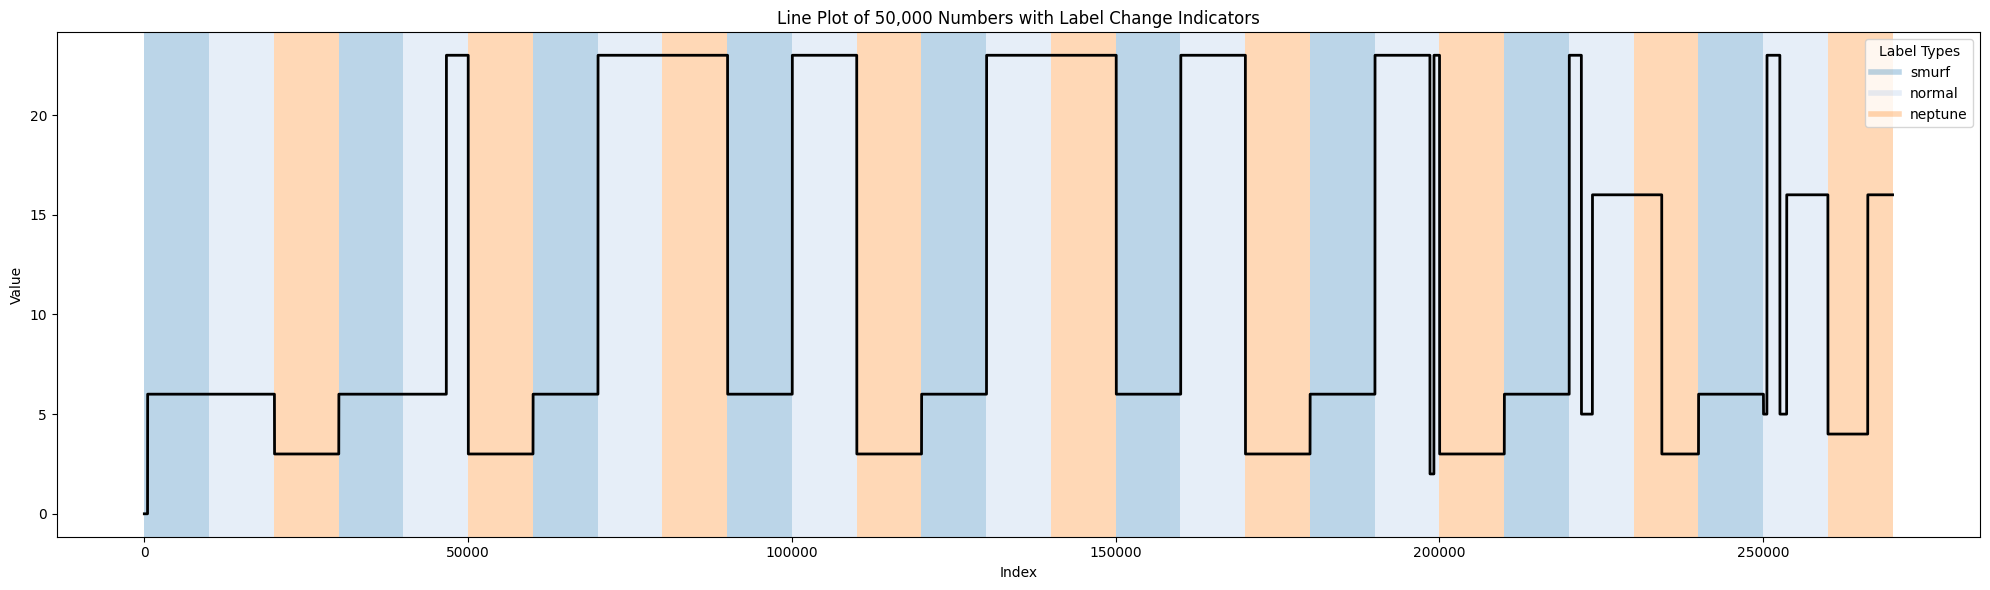

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3) for label in unique_labels]

# Add legend for the label types
plt.legend(legend_handles, unique_labels, title='Label Types', loc='upper right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15284\1827120294.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


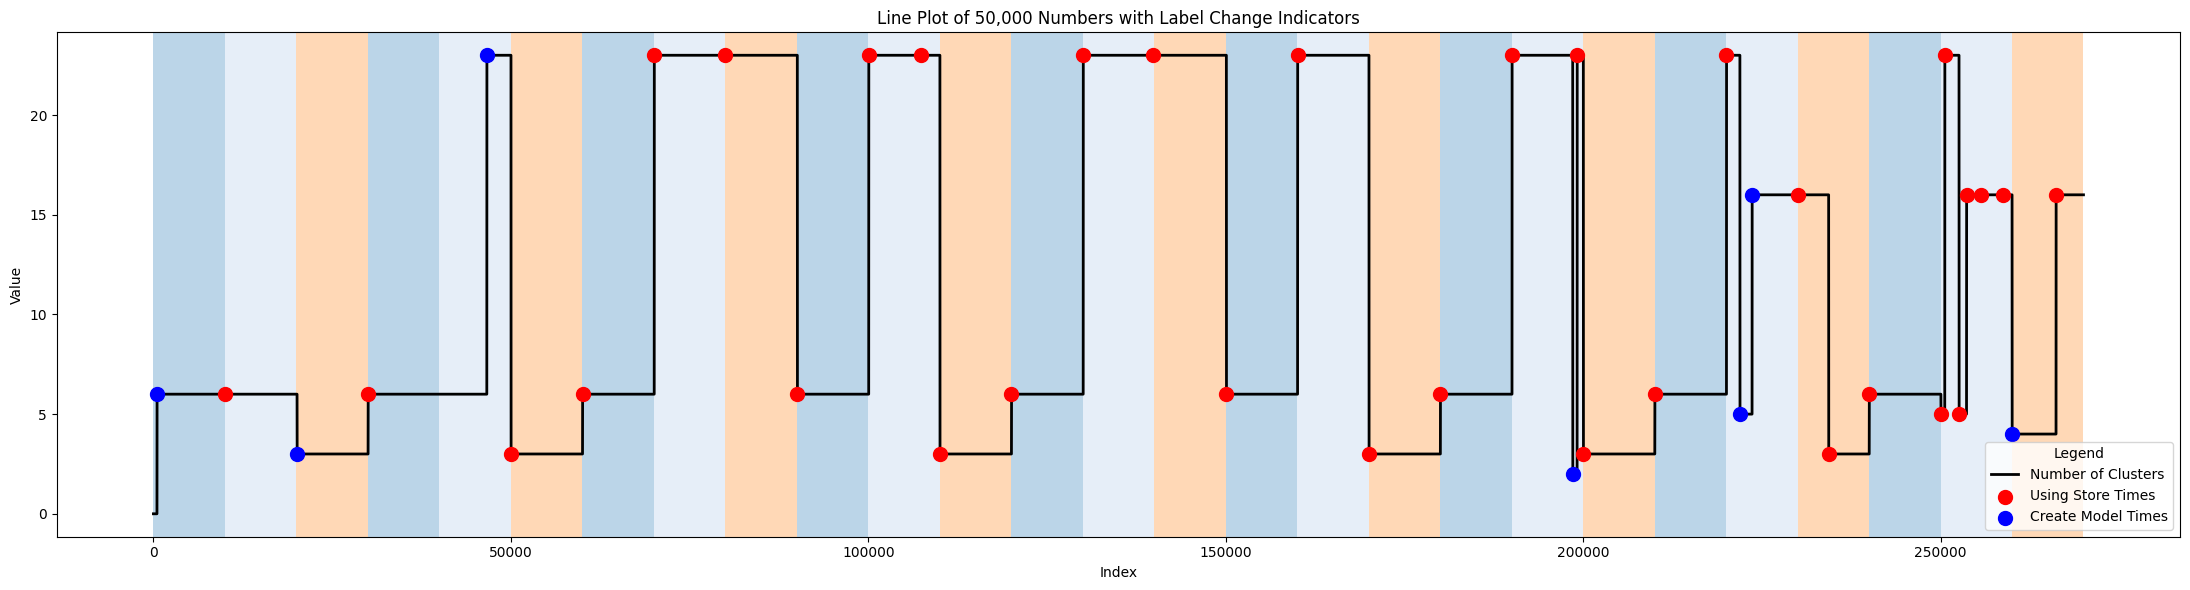

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(22, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=2, linestyle='-', alpha=0.3) for label in unique_labels]

# Add legend for the label types
plt.legend(legend_handles, unique_labels, title='Label Types', loc='upper right')

# Add red big dots for using_store_times
plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
            color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
            color='blue', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
plt.legend(title='Legend', loc='lower right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes_1.jpg', format='jpg')
plt.show()

C:\Users\Morteza\AppData\Local\Temp\ipykernel_15284\603340983.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


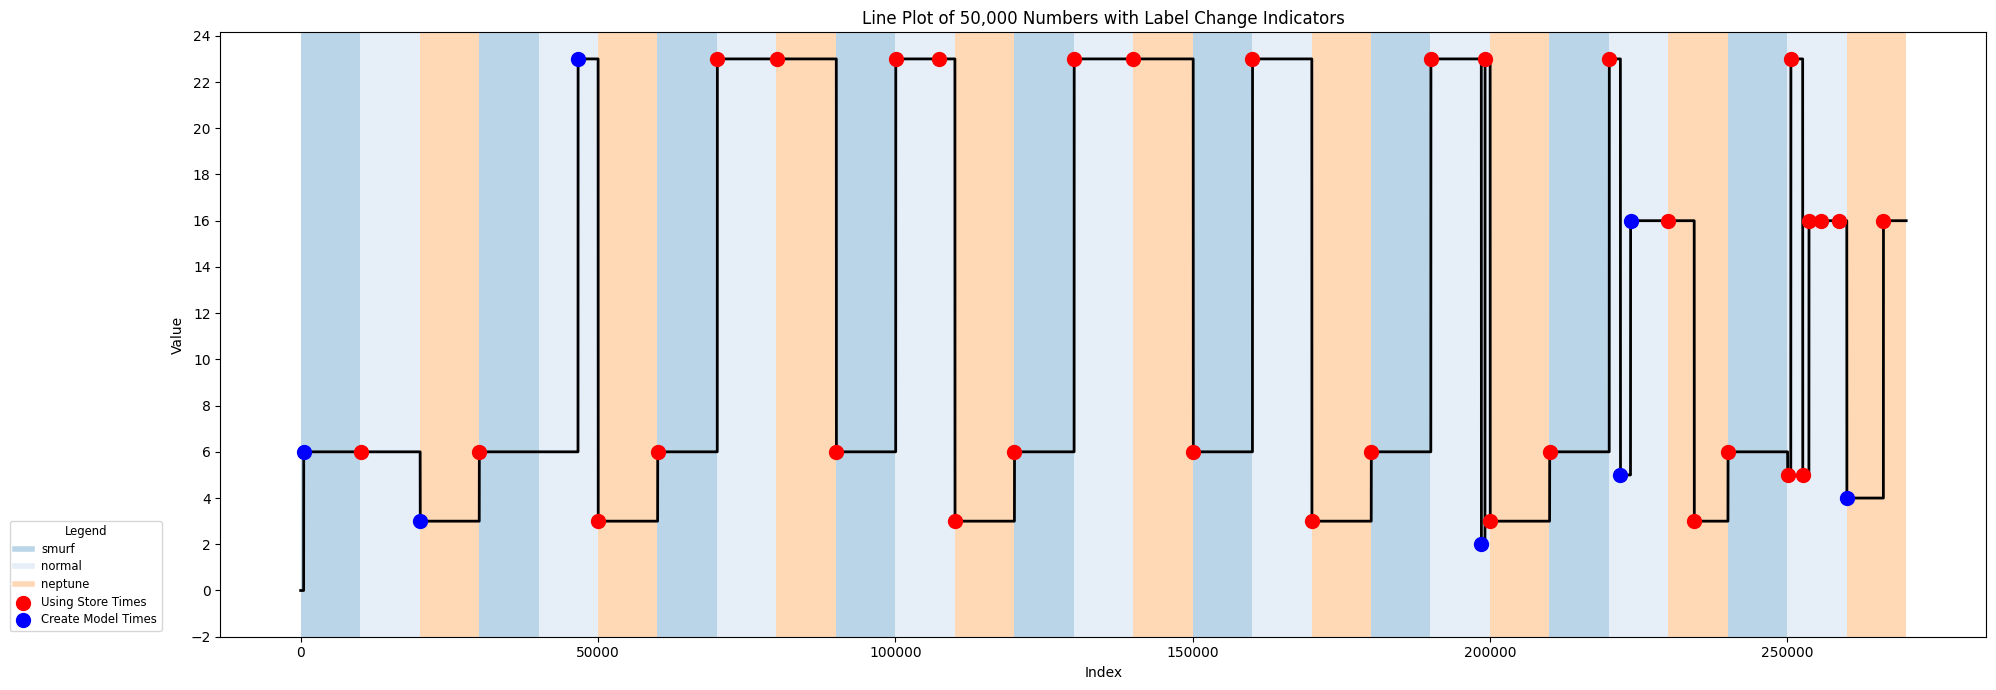

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 7))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]

# Add red big dots for using_store_times
red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                       color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                        color='blue', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
legend_handles.extend([red_dots, blue_dots])

# Show combined legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
              fontsize='small',
    title_fontsize='small',
    labelspacing=0.4, 
    handlelength=1.5 ,
          bbox_to_anchor=(-0.03, 0)) 
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2


plt.grid(False)
plt.tight_layout()
plt.savefig('changes_1.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15284\2557890487.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  model_color_map = {model_index: plt.cm.get_cmap('Set1')(i) for i, model_index in enumerate(unique_models)}


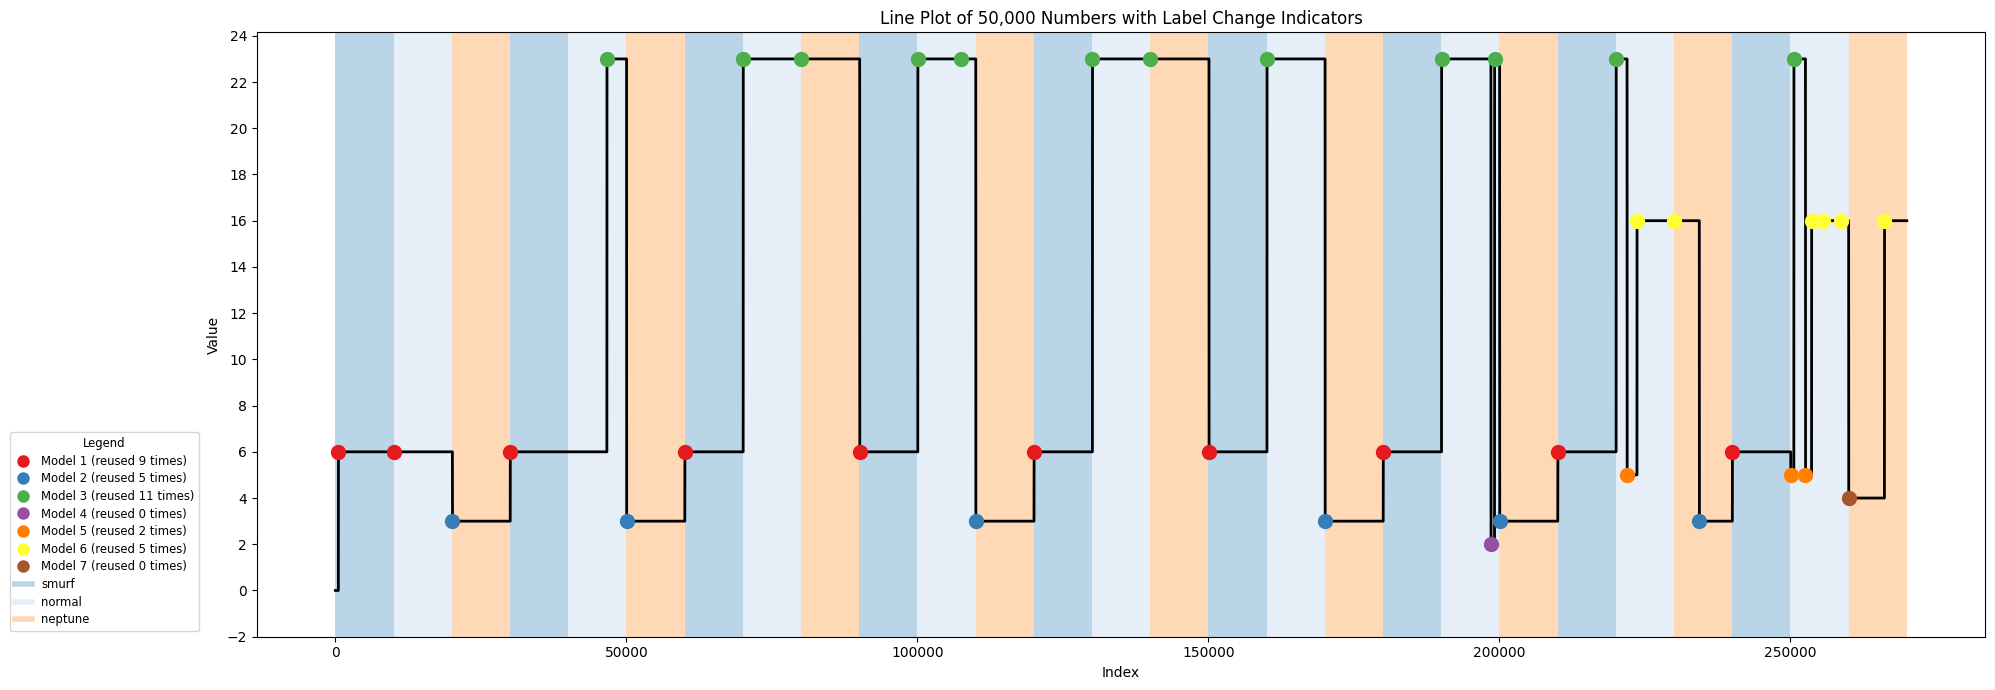

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Generate a color map for created models
unique_models = list(range(len(create_model_times)))
model_color_map = {model_index: plt.cm.get_cmap('Set1')(i) for i, model_index in enumerate(unique_models)}

# Count re-use occurrences of each model in using_store_times_index
reuse_counts = Counter(using_store_times_index)

# Plot the main line
plt.figure(figsize=(20, 7))
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add shaded regions based on label changes in 'result' dataframe
prev_index = result['Index'].iloc[0]
prev_label = result['Label_Name'].iloc[0]

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)
    prev_index = current_index
    prev_label = current_label

plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Add markers for created models
for idx, create_time in enumerate(create_model_times):
    plt.scatter(create_time, numbers_of_clusters[create_time], color=model_color_map[idx], s=100, label=f'Created Model {idx}', zorder=5)

# Add markers for using stored models with consistent color for re-used models
for idx, use_time in enumerate(using_store_times):
    model_idx = using_store_times_index[idx]  # Get the model index used at this time
    plt.scatter(use_time, numbers_of_clusters[use_time], color=model_color_map[model_idx], s=100, 
                label=f'Using Model {model_idx}', zorder=5)

# Prepare the legend
# One entry for each model in the created models list with reuse counts
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_color_map[idx], markersize=10,
               label=f'Model {idx+1} (reused {reuse_counts[idx]} times)' if reuse_counts[idx] >= 0 else f'Model {idx}') 
    for idx in unique_models
]

# Add the label color legend for different label types in result
legend_handles.extend([plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels])

# Show legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
           fontsize='small', title_fontsize='small', labelspacing=0.4, handlelength=1.5, bbox_to_anchor=(-0.03, 0)) 

# Set y-axis ticks
y_min, y_max = plt.ylim()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))

# Finalize and show plot
plt.grid(False)
plt.tight_layout()
plt.savefig('changes_2.jpg', format='jpg')
plt.show()


In [14]:
models

In [39]:
using_store_times_index

[0,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 5,
 1,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [22]:
for idx, use_time in enumerate(using_store_times):
    model_idx = using_store_times_index[idx]  # Get the model index used at this time
    print(idx, model_idx)
    model_color_map[model_idx]
    print(idx, model_idx)


0 1
0 1
1 1
1 1
2 2
2 2
3 1
3 1
4 3
4 3
5 3
5 3
6 1
6 1
7 3
7 3
8 3
8 3
9 2
9 2
10 1
10 1
11 3
11 3
12 3
12 3
13 1
13 1
14 3
14 3
15 2
15 2
16 1
16 1
17 3
17 3
18 3
18 3
19 2
19 2
20 1
20 1
21 3
21 3
22 6


KeyError: 6

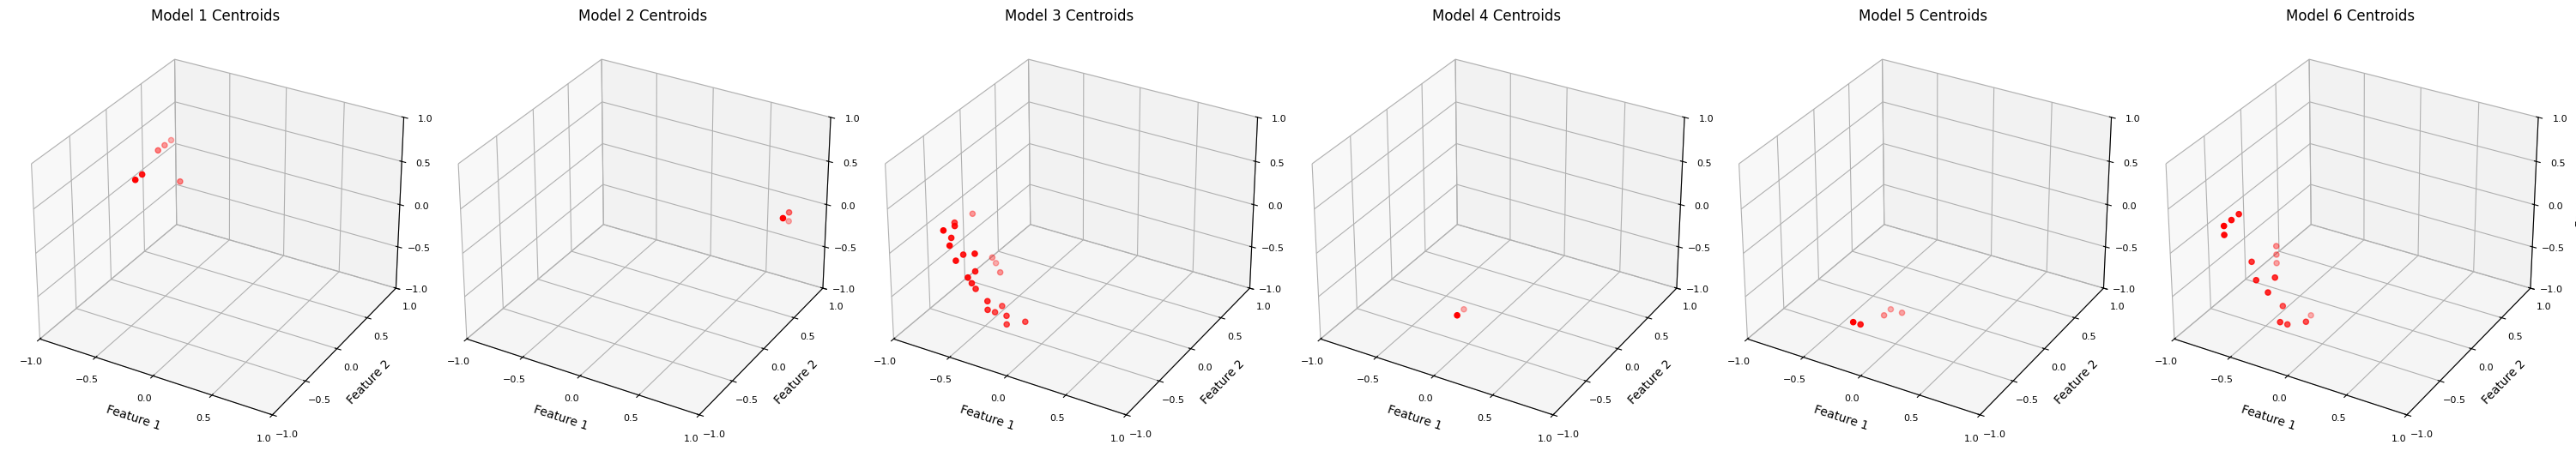

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `models` is your list of models with centroids
num_models = len(models)
cols = 6
rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed

fig = plt.figure(figsize=(5 * cols, 6 * rows))
axs = [fig.add_subplot(rows, cols, i + 1, projection='3d') for i in range(num_models)]

for idx, ax in enumerate(axs):
    model = models[idx]
    centroids = np.array([cluster.centroid for cluster in model.clusters])
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', color='r')
    ax.set_title(f'Model {idx + 1} Centroids')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Set all three dimensions (x, y, z) to range between -1 and 1
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    # Reduce the number of ticks on each axis
    ax.set_xticks(np.linspace(-1, 1, 5))  # Fewer ticks
    ax.set_yticks(np.linspace(-1, 1, 5))
    ax.set_zticks(np.linspace(-1, 1, 5))
    
    # Adjust tick parameters: reduce label size and increase padding
    ax.tick_params(axis='x', labelsize=8, pad=3)  # Smaller font size and padding
    ax.tick_params(axis='y', labelsize=8, pad=3)
    ax.tick_params(axis='z', labelsize=8, pad=3)

# Adjust deletion of axes to ensure no out of range errors
if num_models < rows * cols:
    for ax in axs[num_models:]:  # Get the unused axes from the list
        fig.delaxes(ax)  # Properly delete unused axes

plt.tight_layout()
plt.savefig('cluster_centroids.jpg', format='jpg')
plt.show()
